# load data


In [1]:
%pylab
%matplotlib inline
import numpy as np
import pandas as pd

train_df = pd.read_csv('../data/digit-recogn/train.csv')
img_size=(28,28)
print train_df.shape
print 'done'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
(42000, 785)
done


# explore the dataset
- random choose some image from training set and plot them

In [2]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/crackhopper/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


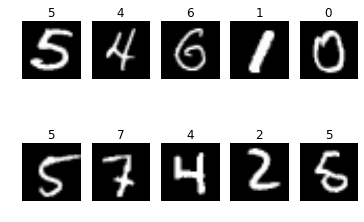

In [3]:
n_row=2
n_col=5
import random
for i in range(n_row*n_col):    
    ind = random.randint(0,42000)
    subplot(n_row,n_col,i)
    title(str(train_df.loc[ind,'label']))
    axis('off')
    imshow(train_df.loc[ind,'pixel0':'pixel783'].reshape(img_size),cmap='gray')


# calculate image average
- average all image with same label

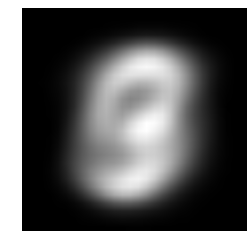

In [4]:
img = mean(train_df)[1:]
img=img.reshape(img_size)
axis('off')
imshow(img, cmap='gray')

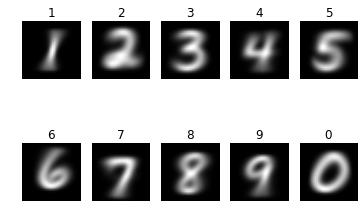

In [5]:
for i in range(10):
    subplot(2,5,i)
    img = mean(train_df[train_df.label==i])[1:]
    img=img.reshape(img_size)
    axis('off')
    title(str(i))
    imshow(img, cmap='gray')

# use the random forest

In [6]:
from sklearn.cross_validation import train_test_split
Xtr, Xte, Ytr, Yte = train_test_split(train_df.values[:,1:].astype(float),train_df.values[:,0],test_size=0.3)
print Xtr.shape
print Ytr.shape

(29400, 784)
(29400,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf.fit(Xtr, Ytr)
score = rf.score(Xte, Yte)
print score

0.632698412698


# tune the parameters
- max_depth of the tree
- the more estimator the better
- max_features is a sensitive parameter

acturally we should search in a boarder range

In [8]:
%%time
arr_depth = [40,80,None]
arr_features = range(7,10)
res=[]
n_valid=2
for dep in arr_depth:
    for nfeat in arr_features:
        score = 0
        print 'max_depth:',dep,'max_features:',nfeat
        for i in range(n_valid):
            Xtr, Xte, Ytr, Yte = train_test_split(train_df.values[:,1:].astype(float),train_df.values[:,0],test_size=0.3)
            rf=RandomForestClassifier(max_depth=dep, n_estimators=40, max_features=3)
            rf.fit(Xtr, Ytr)
            score += rf.score(Xte, Yte)
        res.append(score/n_valid)

max_depth: 40 max_features: 7
max_depth: 40 max_features: 8
max_depth: 40 max_features: 9
max_depth: 80 max_features: 7
max_depth: 80 max_features: 8
max_depth: 80 max_features: 9
max_depth: None max_features: 7
max_depth: None max_features: 8
max_depth: None max_features: 9
CPU times: user 41.9 s, sys: 9.08 s, total: 51 s
Wall time: 51.1 s


# choose the best parameter
- the max score

In [14]:
#import sklearn.preprocessing as prep
#min_max_scaler = prep.MinMaxScaler()
scores = np.array(res)
ndep=len(arr_depth)
nfeat=len(arr_features)
idx = np.argmax(scores)
print idx,scores[idx]
md = arr_depth[idx//ndep]
mf = arr_features[idx%ndep]
print 'max_depth',md
print 'max_features',mf

0 0.948095238095
max_depth 40
max_features 7


In [10]:
# train the model 
Xtr, Xte, Ytr, Yte = train_test_split(train_df.values[:,1:].astype(float),train_df.values[:,0],test_size=0)
rf=RandomForestClassifier(max_depth=md, n_estimators=40, max_features=mf)
rf.fit(Xtr, Ytr)

# training error
print rf.score(Xtr,Ytr)

1.0


# plot feature importance


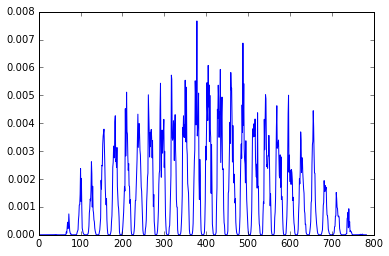

In [11]:
plot(range(len(rf.feature_importances_)),rf.feature_importances_)

227


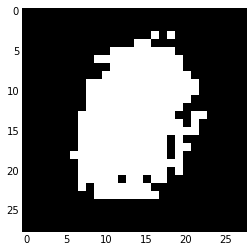

In [12]:
impt = np.array(rf.feature_importances_>0.002).reshape(img_size)
imshow(impt,interpolation='nearest',cmap='gray')
print sum(impt)

56


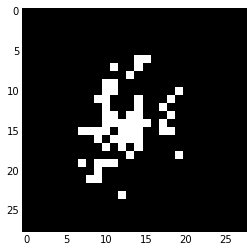

In [13]:
impt = np.array(rf.feature_importances_>0.004).reshape(img_size)
imshow(impt,interpolation='nearest',cmap='gray')
print sum(impt)